## Heart Stroke Prediction using Machine Learning 

##### What is Machine Learning ??
Machine Learning is a subfield of artificial intelligence (AI) that focuses on using data and algorithms to simulate how humans learn, gradually increasing the accuracy of the system. The rapidly expanding discipline of data science includes machine learning as a key element. Algorithms are trained using statistical techniques to produce classifications or predictions and to find important insights in data mining projects. The decisions made as a result of these insights influence key growth indicators in applications and enterprises, ideally.

##### Abstract :
Heart strokes are quite common in our daily life. Majority of the people prone to heart attacks because of their smoking habits. Despite knowing the consequences of the smoking, Nowadays many people are addicted to it and are unable to quit it. In this context, robust countermeasures must be developed in order to keep track of their health. This is where the machine learning comes into picture to predict the effect of heart disease by considering some important features. In this brief, a novel approach for heart stroke detection that considers features from the dataset by integrating with the algorithms is proposed. Experiments on the Healthcare dataset indicate that such algorithms like logistic regression and Naive Bayes algorithm outperform other state-of-the-art algorithms, presenting great results in terms of attack detection.

##### Introduction :
In this study, we are using healthcare datasets with stroke data to build an effective model that can predict a person's propensity for a heart attack.
Here, let's provide a summary of the steps taken to get the desired results.
loading the data is the first stage, and then To explore the loaded data, we'll utilize the pandas library. To establish if a certain variable is discrete (categorical) or continuous, we will first check the data type for each variable. The cardinality of the categorical variables should be noted, as well as any columns with blank values.
The data will subsequently undergo preprocessing.
Here, we can easily remove some of the data and continue working with the remaining data. Filling in missing values, normalizing continuous variables, and serializing categorical variables are all phases in the preparation of data. Simply creating two lists—one for continuous variables and the other for categorical data—is all that is required and then we select any two of the machine learning algorithms and we train the models and the accuracy of the models will be evaluated based on the metrics like accuracy score, standard deviation, AUC score, precision, recall, f1 score etc.


##### What are the different types of algorithms available to solve this problem ?
Among many algorithms that can be used to solve this problem these are most efficient ones

* Logistic Regression
* SVM
* KNearestNeighbors
* GaussianNB
* BernoulliNB
* DecisionTree
* RandomForest
* AdaBoostClassifier
* Naive-Bayes

##### Why we chose the below two algorithms to predict the heart stroke ?
Logical Regression and Naive-Bayes
Naive Bayes algorithm could be extremely fast relative to other classification algorithms. It is known to outperform even highly sophisticated classification methods. The test data set class can be predicted quickly and easily. Additionally, it excels at multiclass prediction. A Naive Bayes classifier performs better when the assumption of independence is true than other models, such as logistic regression, and requires fewer training data. Compared to a numerical variable, it performs well with categorical input variables (s). It is assumed that numerical variables have a normal distribution.



In [44]:
# Importing all the necessary Libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sk-learn packages 

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB

DATASET : 'Healthcare-dataset-stroke-data.csv'

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. The features that are present in the dataset are :

id: unique identifier 

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 

 ever_married: "No" or "Yes" 
 
 work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" 
 
 Residence_type: "Rural" or "Urban" 
 
 avg_glucose_level: average glucose level in blood
 
  bmi: body mass index 
  
  smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* 
  
  stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

In [45]:
# Reading the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


#### Data exploration

<AxesSubplot:>

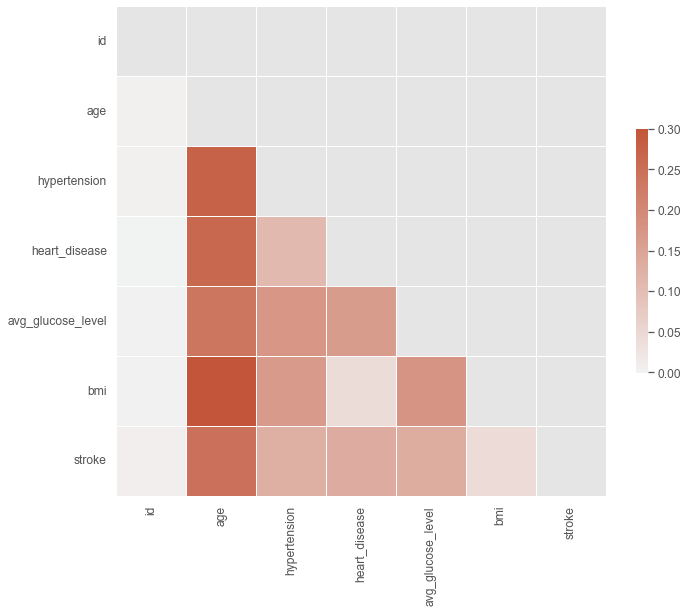

In [46]:
# correlation matrix
corr = df.corr()

# diverging color map
mask = np.triu(np.ones_like(corr,dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

In [47]:
# The detailed information about the data frame describing about all the features/variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Visualizing the Dataset to understand the data

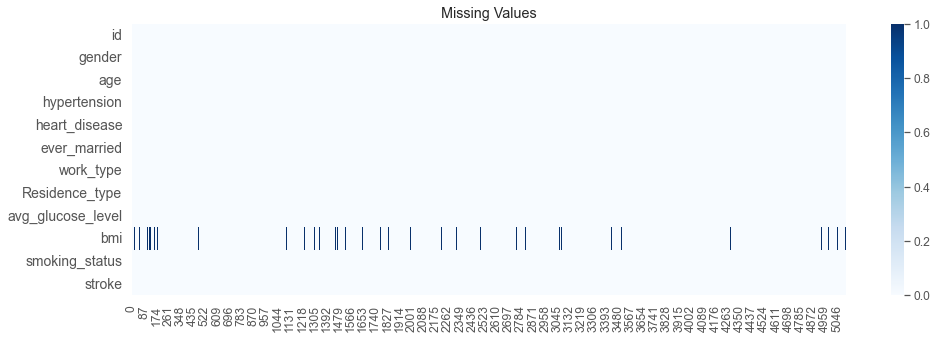

In [48]:
#Showing Missing values in data
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))

#using heatmap function to plot out data,and transpose function for data orientation digonaly.
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values')

#using tics function to plot tic in the graph.
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


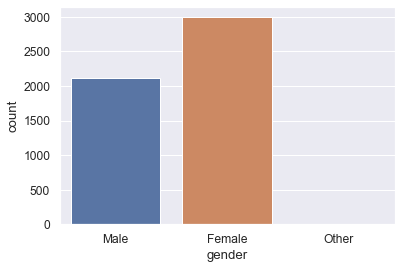

In [49]:
print(df.gender.value_counts())
sns.set_theme(font_scale=1.1,style='darkgrid')
ax1 = sns.countplot(data=df,x='gender')



##### all the missing values are in the BMI attribute

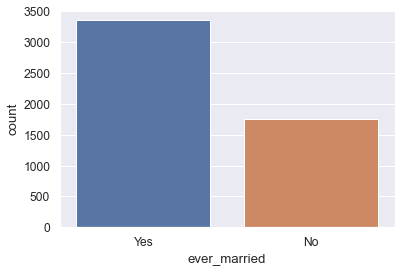

In [50]:
ax2 = sns.countplot(data=df, x='ever_married')

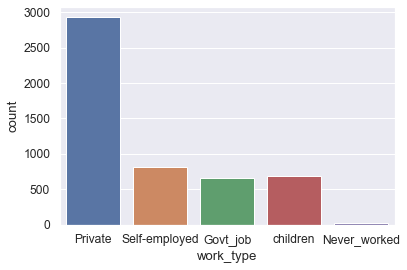

In [51]:
ax = sns.countplot(data=df,x='work_type')

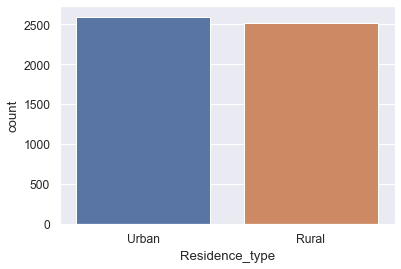

In [52]:
ax = sns.countplot(data=df,x='Residence_type')

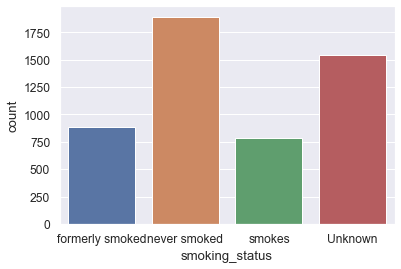

In [53]:
ax = sns.countplot(data=df,x='smoking_status')

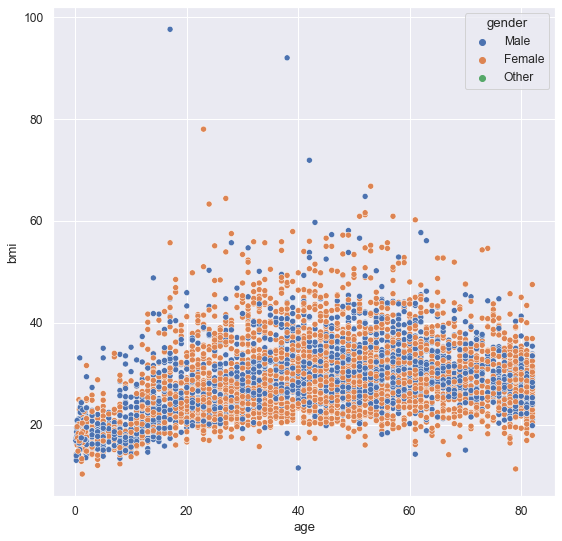

In [54]:
fig = plt.figure(figsize=(9,9))
graph = sns.scatterplot(data=df,x='age',y='bmi',hue='gender')
# graph.axhline(y=25, linewidth=4,color='r',linestyle= '--')

#### Data Preprocessing and Cleaning 
This step is to clean the data and replace the null values if any by calculating the mean/mode of entire data of that particular feature. This pre processing and cleaning helps the model to predict with much better accuracy since there will be no flaws in the data. 

In [55]:
# Checking if any null values are present in the data frame. 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [56]:
# Replacing the null values in "bmi" by calculating the mean values of column "bmi"
df['bmi'].fillna(value=df['bmi'].mean(),inplace=True)

In [57]:
# After cleaning, the null values are removed and the data frame is ready to be used the model
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [58]:
# Importing all the additional necessary packages from sk-learn library 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Categorical inputs and Dummy variables

If the inputs are categorical variables, they need to be encoded and most of the time we use dummy variables and one-hot encoding. 

For example : If we have a 'gender' input with values "Male", "Female", we can encode it using ”1”, ”2”.

As an alternative, We can also use one-hot encoding by adding three more binary input variables.

      


In [59]:
# Using Label Encoder, we encode the below useful features so that the algorithm performs better. 
lab_encoder = LabelEncoder()
df['smoking_status'] = lab_encoder.fit_transform(df['smoking_status'])
lab_gender = LabelEncoder()
df['gender'] = lab_gender.fit_transform(df['gender'])

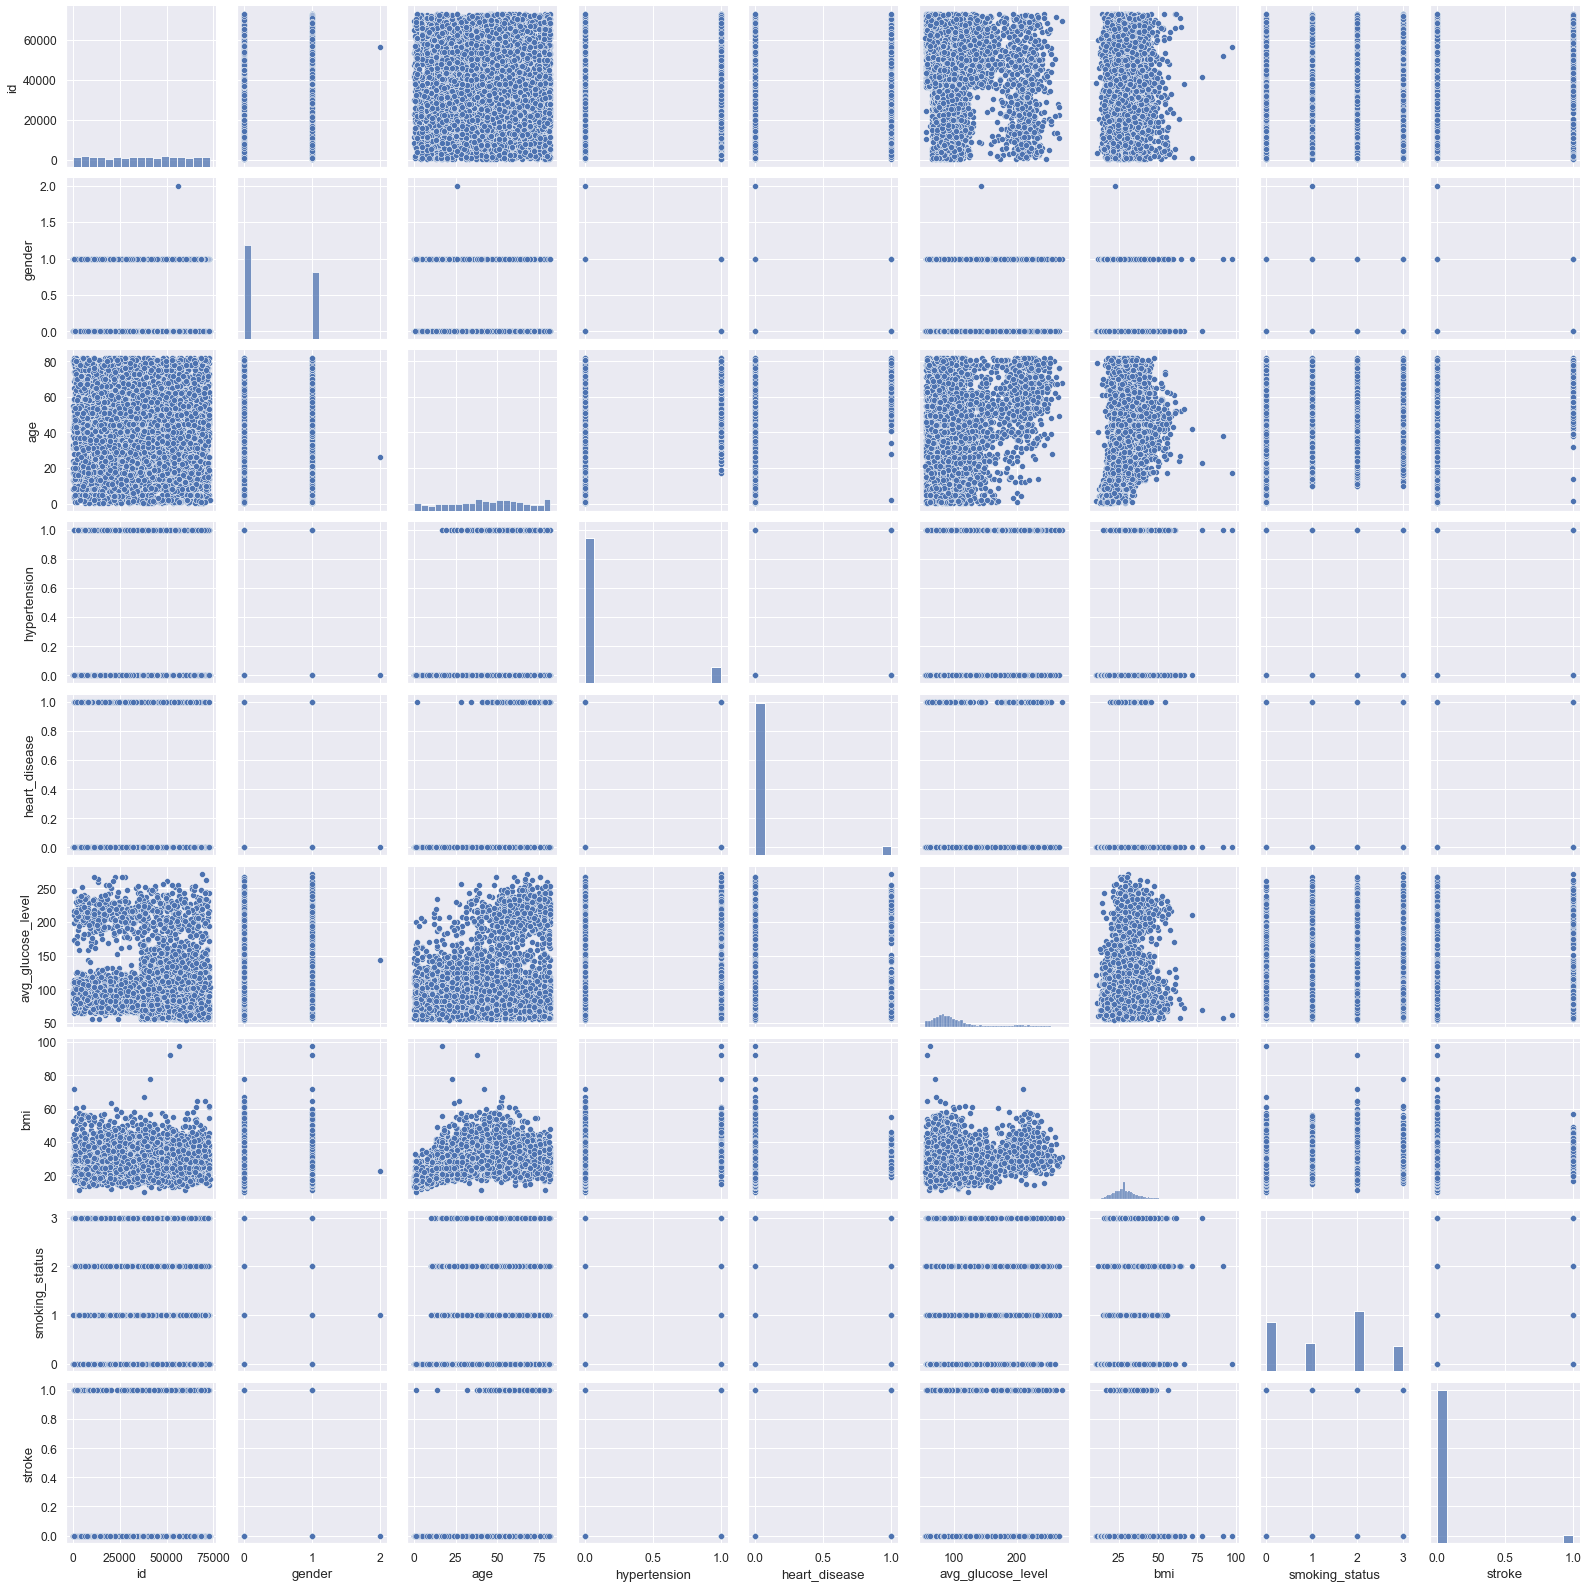

In [60]:
# Below function visualizes given data to find the relationship between them where the variables can be continuous or categorical. 
sns.pairplot(df)

#### Logistic Regression Classifier 

 * What is Logistic Regression ?

Logistic regression is an example of a classifier which is used to estimate the probability that an instance belongs to a particular class. Instead of making predictions yˆ(i) ∈ {+1, −1}, logistic regression generates real-valued outputs in the interval (0, 1). A linear logistic classifier has the form :

                 h(x; w, b) = σ(wT x + b) ; where w ∈ R^d and b ∈ R are parameters

* How does this algorithm works ?

The output of the logistic regression is a value in (0, 1), if we need to make a prediction for a label in {+1, −1}, by default :

– we classify x(i) as an positive example if σ(wT x(i) + b) > 0.5

– we classify x(i) as a negative example if σ(wT x(i) + b) < 0.5

#### Model Train and Scaling 

We consider some of the important input features from the input data which are useful for predicting the output. We also scale the input the data before the fitting the data using the defined model.

In [61]:
# X holds the assumed features which would be useful in predicting if the person is prone to stroke or not. 
# And y is output feature which is our predicted variable.

df
X = df[[ 'avg_glucose_level', 'age', 'bmi', 'smoking_status']]
y = df['stroke']

In [62]:
# Splitting the Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [63]:
# Scaling : Scaling is a method used to normalize the range of independent variables or features of data.
# For Example :— if you have multiple independent variables like age, bmi, and glucose_level, With their range as (18–100 Years), (10-100 ), and (10–1000 ) respectively.
# Feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.
# There are different scalers available in sk-learn namely StandardScaler, MinMaxScaler. For Logistic Regression, We are using MinMaxScaler. 

scaler = MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Fitting the data using predefined function Logistic Regression from sk-learn library  
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#### Evaluation methods and metrics for classifier
* Confusion Matrix :
The confusion matrix is a way to summarize how the model performed. It is a square matrix whose size is the same as the number of different output labels. In sklearn, the rows correspond to the observed or the actual labels and the columns correspond to the labels predicted by the model. The diagonal elements in the matrix contain the number of data instances that were correctly classified by the model, while the other entries contain the number of data instances that were misclassified by the model.

We use the confusion matrix to define many different measures.

* Accuracy :
Accuracy is the percentage of correct predictions.
    
    Accuracy = TP + TN / TP + TN + FP + FN

* Precision :
Precision is the percentage of the positive predictions which are correct.
    
    Precision = TP / TP + FP 

* Recall :
Recall is the percentage of positive observations that were correctly classified.
    
    Recall = TP / TP + FN 

* F1-Score :
F1-score is defined, for each class, as the harmonic average of the recall and the precision
    
    F1 = 2 * Recall / Precision Recall + Precision



In [65]:
# Training Accuracy of the model
model.score(X_train, y_train)

0.9509394572025052

In [66]:
# Testing Accuracy of the model
model.score(X_test, y_test)

0.9522691705790297

In [67]:
# Predicted output of the test set 
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
# Confusion Matrix of the model 
confusion_matrix(y_test, y_predicted)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1217,    0],
       [  61,    0]])

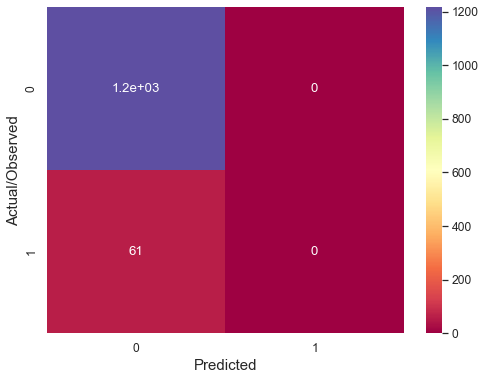

In [69]:
# Plotting the heat map 
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, cmap = "Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [70]:
# Classification Report : This report explains all the evaluation metrics of the classifier in detail 
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1217
           1       0.00      0.00      0.00        61

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



/Users/harshabollina/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshabollina/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshabollina/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

#### Naive Bayes 

What is Naive Bayes Algorithm ?
* Naive Bayes is a classification method that uses the Bayes Theorem and the premise of predictor independence. A Naive Bayes classifier, to put it simply, believes that the presence of one feature in a class has nothing to do with the presence of any other feature. Simple to construct and especially helpful for very big data sets is the naive Bayes model. Along with being straightforward, Naive Bayes is known to perform better than even the most complex classification techniques.


How does this Algorithm works ?
* naive bayes works on Bayes theorem of probability to predict the class of unknown data sets.



In [71]:
# Importing the necessary Libraries
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate

In [72]:
# Considering all the input variables from the data set 
X = df[[ "age", "heart_disease", "avg_glucose_level", "bmi", "smoking_status", "hypertension"]]
y = df["stroke"]

In [73]:
# Meta estimator that fits a number of randomized decision tree
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

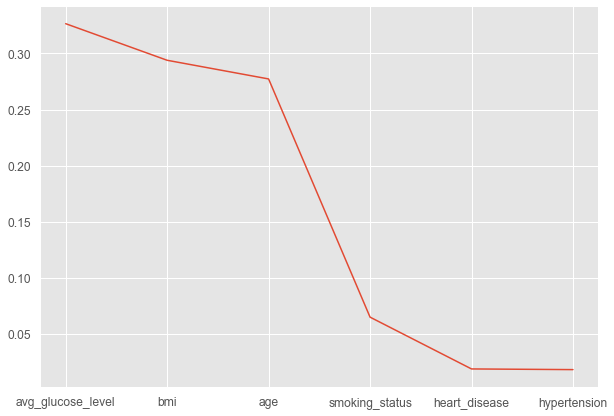

In [74]:
# plot that shows which variable is best suitable for using as input variables
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='line')
plt.show()

<AxesSubplot:>

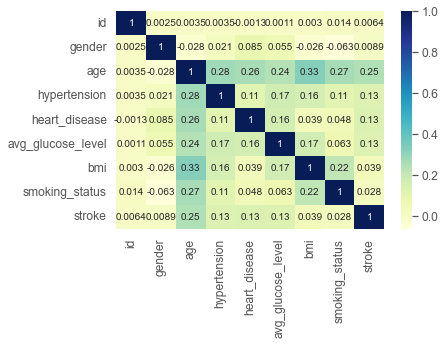

In [75]:
# Heat map of Naive Bayes Algorithm
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [76]:
# Selected input variables for predicitng the stroke which is the output variable 
X =  df[['avg_glucose_level', 'bmi', 'age']]
y = df['stroke']


In [77]:
# Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [78]:
# Using the scaler on the data that needs to be trained by the model
scaler = MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Using Gaussian Distribution from Naive Bayes Algorithm
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [80]:
# Predicted output based on the scaled training data
y_pred = model.predict(X_test_scaled)

In [81]:
# Test Accuracy of the model
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.9148727984344422


In [82]:
# Confusion Matrix of the model
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[928  35]
 [ 52   7]]


In [83]:
# Classification Report of the Model
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       963
           1       0.17      0.12      0.14        59

    accuracy                           0.91      1022
   macro avg       0.56      0.54      0.55      1022
weighted avg       0.90      0.91      0.91      1022



In [84]:
# Taking one random example and testing out if our model is predicting it correct
model.predict([[228.69,36.600,67.0]])


array([1])

#### Comparing Logistic Regression and Naive Bayes Algorithms 

1. Accuracy attained in the Naive Bayes is higher than that of Accuracy attained in Logistic Regression

2. Both the Naive Bayes Algorithm were able to predict the positive classes, i.e able to detect the people who are affected to stroke almost pretty correctly.

3. Logistic Regression was unable to predict the negative classes, i.e Unable to detect the people who are not affected stroke based on the selected input variables while Naive Bayes was able to predict them.

4. Recall and precision for Naive Bayes are very much better when compared to the recall and precision of Logistic Regression.

